In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Ice_cream selling data.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


<AxesSubplot:>

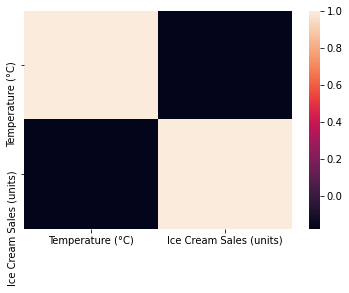

In [3]:
sns.heatmap(df.corr())
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


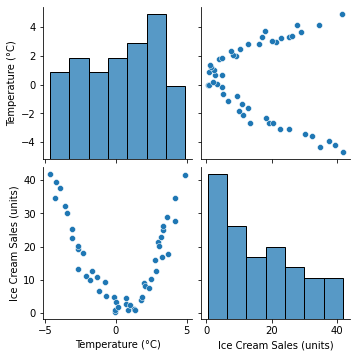

In [4]:
sns.pairplot(df)
df.info()

<AxesSubplot:xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

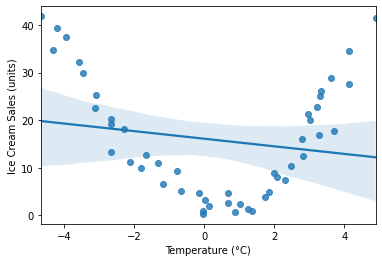

In [5]:
sns.regplot(x=df['Temperature (°C)'],y=df['Ice Cream Sales (units)'])

In [6]:
x=df[['Temperature (°C)']]

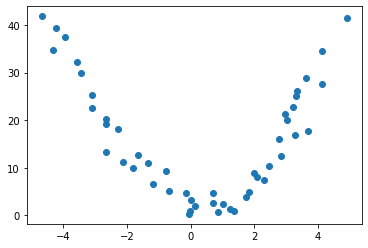

In [7]:
plt.scatter(df['Temperature (°C)'] ,df['Ice Cream Sales (units)'])

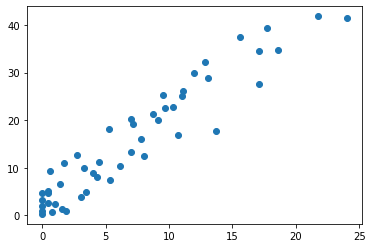

In [8]:
plt.scatter(df['Temperature (°C)']*df['Temperature (°C)'],df['Ice Cream Sales (units)'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [10]:
x=df[['Temperature (°C)']]
y=df[['Ice Cream Sales (units)']]


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [13]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
print(x_poly)

[[ 1.00000000e+00  2.95993209e+00  8.76119799e+00]
 [ 1.00000000e+00 -4.21398476e+00  1.77576676e+01]
 [ 1.00000000e+00  3.02087431e+00  9.12568162e+00]
 [ 1.00000000e+00  1.99931037e+00  3.99724195e+00]
 [ 1.00000000e+00 -2.65149803e+00  7.03044182e+00]
 [ 1.00000000e+00 -3.38952856e-02  1.14889038e-03]
 [ 1.00000000e+00  2.47194600e+00  6.11051701e+00]
 [ 1.00000000e+00  1.02418081e+00  1.04894634e+00]
 [ 1.00000000e+00 -6.73752802e-01  4.53942838e-01]
 [ 1.00000000e+00  1.85055193e+00  3.42454243e+00]
 [ 1.00000000e+00 -4.31655945e+00  1.86326855e+01]
 [ 1.00000000e+00 -2.11186969e+00  4.45999359e+00]
 [ 1.00000000e+00  2.31859124e+00  5.37586534e+00]
 [ 1.00000000e+00  3.61077848e+00  1.30377212e+01]
 [ 1.00000000e+00  8.74905029e-01  7.65458810e-01]
 [ 1.00000000e+00 -3.45571170e+00  1.19419433e+01]
 [ 1.00000000e+00 -1.81893761e+00  3.30853403e+00]
 [ 1.00000000e+00  8.60769873e-03  7.40924775e-05]
 [ 1.00000000e+00 -1.49634867e-01  2.23905933e-02]
 [ 1.00000000e+00 -7.73330043e-

In [14]:
model=LinearRegression()
model.fit(x_poly,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(poly.fit_transform(x_test))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

11.186143275103154
0.9300570976550553


In [22]:
import numpy as np

In [29]:
##MOST IMP


r2=[]
r_score=0
for i in range(1,16):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x_train)
    model=LinearRegression()
    model.fit(x_poly,y_train)
    y_pred=model.predict(poly.fit_transform(x_test))
    r_new=r2_score(y_test,y_pred)
    r2.append(r_new)
    if r_new>r_score:
        deg=i
        r_score=r_new
        y_4=model.predict(poly.fit_transform(np.array([[4]])))
print(deg,r_score,y_4)

6 0.9496296635022425 [[30.18722737]]


In [32]:
##AKHI SYNTAX AAI JAAY
LinearRegression??


In [1]:
LinearRegression??


Object `LinearRegression` not found.


In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
f=pd.read_csv("Iris.csv")
z=pd.DataFrame(f)
x=z[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=z["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pre=model.predict(x_test)
acc=accuracy_score(y_test,pre)
cm=confusion_matrix(y_test,pre)
cr=classification_report(y_test,pre)
print(acc)
print(cm)
print(cr)

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
f=pd.read_csv("diabetes.csv")
z=pd.DataFrame(f)
z

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
f=pd.read_csv("cancer.csv")
z=pd.DataFrame(f)
z

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
